In [142]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix,roc_curve, auc, classification_report, accuracy_score, roc_auc_score, precision_score, recall_score, f1_score

In [143]:
dataset = pd.read_csv("preprocessed_dataset.csv")
dataset

,Age,Gender,Country,self_employed,treatment,work_interfere,tech_company,mental_health_benefits,resources_to_help,leave,coworkers,supervisor,mental_vs_physical,family_history,mental_health_interview,physical_health_interview,year,Age-Group
0,46,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2014,41-65
1,36,0,1,0,0,0,0,1,0,0,1,1,1,0,1,1,2014,31-40
2,29,0,0,1,1,0,0,0,0,1,1,1,2,0,0,2,2014,21-30
3,31,0,0,0,0,1,0,1,0,1,1,1,0,1,0,1,2014,31-40
4,46,0,0,1,1,0,0,0,0,2,1,0,2,1,0,1,2014,41-65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4144,27,0,17,1,0,0,1,1,0,1,2,2,2,1,0,1,2019,21-30
4145,48,0,0,0,0,2,0,1,0,0,1,1,2,1,1,1,2019,41-65
4146,50,0,17,0,0,0,0,1,0,0,1,1,2,1,0,0,2019,41-65
4147,30,1,17,1,0,0,0,1,0,1,1,2,2,1,0,2,2019,21-30


In [144]:
#X,Y splitting
X = dataset.drop(columns = ["treatment","Age-Group"])
y = dataset["treatment"]

#Train, test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

#### Logistic regression

In [145]:
import warnings
warnings.filterwarnings('ignore')

In [146]:
#PCA reduction to 2 components
pca_reduction = PCA(n_components=2)
X_train_pca = pca_reduction.fit_transform(X_train)
X_test_pca = pca_reduction.transform(X_test)

#training model
logistic_regression = LogisticRegression(random_state=0)
logistic_regression.fit(X_train_pca, y_train)

#predicting y values
y_pred = logistic_regression.predict(X_test_pca)

output=[]
for i in range(len(y_pred)):
    if (y_pred[i] >= 0.5):
        output.append(1)
    else:
        output.append(0)


In [147]:
#Calculating performance metrics
accuracy = accuracy_score(y_test, output)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1Score = f1_score(y_test, y_pred)
classify_report = classification_report(y_test, y_pred)

print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)
print("f1 Score: ", f1Score)
print("Report: ", classify_report)

Accuracy:  0.5951807228915663
Precision:  0.5938337801608579
Recall:  0.930672268907563
f1 Score:  0.7250409165302781
Report:                precision    recall  f1-score   support

           0       0.61      0.14      0.23       354
           1       0.59      0.93      0.73       476

    accuracy                           0.60       830
   macro avg       0.60      0.54      0.48       830
weighted avg       0.60      0.60      0.52       830



###### Optimization of logistic regression

In [7]:
#Hyper parameters
params =  {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100], 
    'solver': ['liblinear', 'saga','newton-cg', 'lbfgs'], 
    'class_weight': [None, 'balanced']
}
#Tuning the hyper parameters and printing the best parameters
optimised_model = GridSearchCV(logistic_regression, params, cv=5)
optimised_model.fit(X_train_pca, y_train)
print("Best Hyperparameters:", optimised_model.best_params_)
print("Best Accuracy on Training Set:", optimised_model.best_score_)

Best Hyperparameters: {'C': 0.01, 'class_weight': None, 'penalty': 'l1', 'solver': 'liblinear'}
Best Accuracy on Training Set: 0.6035022442712024


In [8]:
#Training the model on these best parameters
best_lr_model = LogisticRegression(C=0.01, class_weight=None, penalty='l1', solver='liblinear')
best_lr_model.fit(X_train_pca,y_train)

#predicting the test values
y_pred = best_lr_model.predict(X_test_pca)

In [9]:
#Calculating the performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1Score = f1_score(y_test, y_pred)
classify_report = classification_report(y_test, y_pred)

print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)
print("f1 Score: ", f1Score)
print("Report: ", classify_report)

Accuracy:  0.6036144578313253
Precision:  0.603085553997195
Recall:  0.9033613445378151
f1 Score:  0.7232968881412952
Report:                precision    recall  f1-score   support

           0       0.61      0.20      0.30       354
           1       0.60      0.90      0.72       476

    accuracy                           0.60       830
   macro avg       0.60      0.55      0.51       830
weighted avg       0.60      0.60      0.54       830



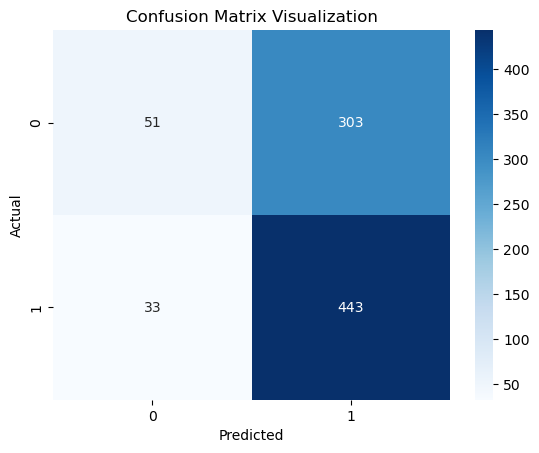

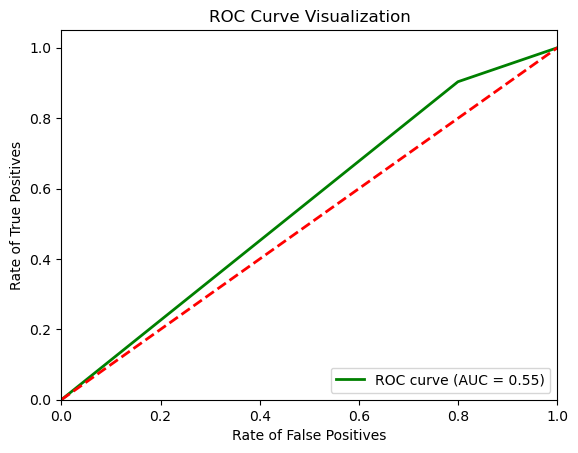

In [10]:
#plotting Confusion matrix
cm = confusion_matrix(y_test, output)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Visualization')
plt.show()

#ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='green', lw=lw, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Rate of False Positives')
plt.ylabel('Rate of True Positives')
plt.title('ROC Curve Visualization')
plt.legend(loc="lower right")
plt.show()

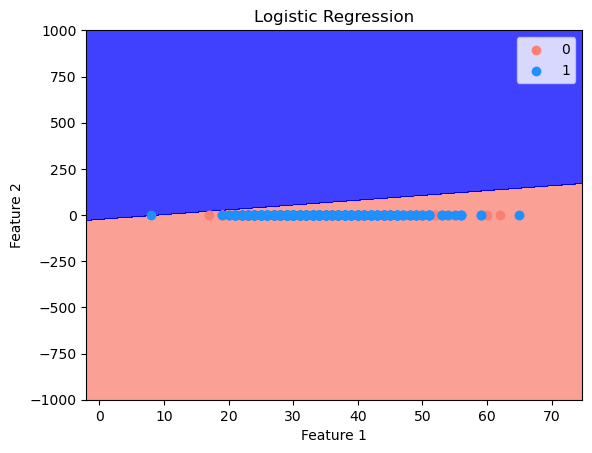

In [11]:
#Decision bounday plot
X_values = X_test.values
X1, X2 = np.meshgrid(np.arange(start=X_values[:, 0].min() - 10, stop=X_values[:, 0].max() + 10, step=0.25),
                     np.arange(start=X_values[:, 1].min() - 1000, stop=X_values[:, 1].max() + 1000, step=0.25))

Z = logistic_regression.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape) 
plt.contourf(X1, X2, Z, alpha=0.75, cmap=ListedColormap(('salmon', 'blue'))) #Decision boundary
# Scatter plot of the test data points
for i, j in enumerate(np.unique(y_test)):
    plt.scatter(X_values[y_test == j, 0], X_values[y_test == j, 1], c=ListedColormap(('salmon', 'dodgerblue'))(i), label=j)

plt.title('Logistic Regression')
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

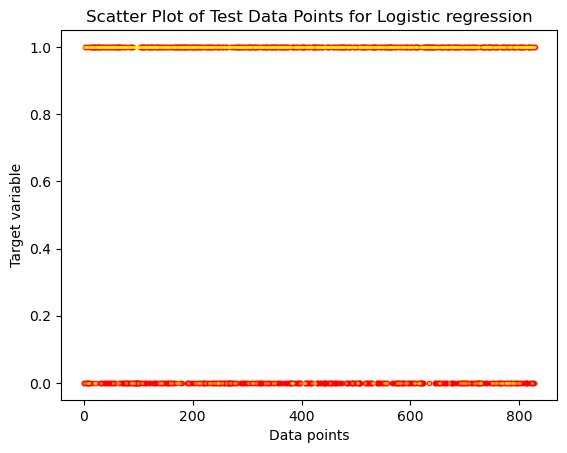

In [12]:
#scatter plot for test data
plt.scatter(range(len(y_test)), y_test, color='red', label='Actual values',s=10,alpha= 0.8)
plt.scatter(range(len(y_test)), y_pred, color='yellow', label='Predicted values', marker='x',s=2,alpha=0.5)
plt.xlabel('Data points')
plt.ylabel('Target variable')
plt.title('Scatter Plot of Test Data Points for Logistic regression')
plt.show()

#### Support Vector Machine

In [13]:
#training model
from sklearn.svm import SVC
SVM = SVC(random_state = 42,kernel='rbf')
SVM.fit(X_train_pca, y_train)

#testing the trained model with test data
y_pred_svm = SVM.predict(X_test_pca)

In [14]:
#performance metrics
accuracy = accuracy_score(y_test, y_pred_svm)
precision = precision_score(y_test, y_pred_svm)
recall = recall_score(y_test, y_pred_svm)
f1Score = f1_score(y_test, y_pred_svm)
classify_report = classification_report(y_test, y_pred_svm)

print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)
print("f1 Score: ", f1Score)
print("Report: ", classify_report)

Accuracy:  0.5963855421686747
Precision:  0.5983263598326359
Recall:  0.9012605042016807
f1 Score:  0.719195305951383
Report:                precision    recall  f1-score   support

           0       0.58      0.19      0.28       354
           1       0.60      0.90      0.72       476

    accuracy                           0.60       830
   macro avg       0.59      0.54      0.50       830
weighted avg       0.59      0.60      0.53       830



###### Optimization of SVM

In [15]:
#Hyper parameters
params_svm = {
    'C': [0.01, 0.1, 1, 10],
    'gamma': [0.01, 0.1, 1, 10],
}
#Tuning the hyper parameters and printing the best parameters
optimised_model_svm = GridSearchCV(SVM, params_svm)
optimised_model_svm.fit(X_train_pca, y_train)
print("Best Hyperparameters:", optimised_model_svm.best_params_)
print("Best Accuracy on Training Set:", optimised_model_svm.best_score_)

Best Hyperparameters: {'C': 1, 'gamma': 0.01}
Best Accuracy on Training Set: 0.5983772192843773


In [78]:
#Training the model on these best parameters
best_svm_model = SVC(C=1, kernel='rbf', gamma = 0.01,probability=True)
best_svm_model.fit(X_train_pca,y_train)

#predicting the test values
y_pred_svm = best_svm_model.predict(X_test_pca)

In [79]:
#Performance metrics
accuracy = accuracy_score(y_test, y_pred_svm)
precision = precision_score(y_test, y_pred_svm)
recall = recall_score(y_test, y_pred_svm)
f1Score = f1_score(y_test, y_pred_svm)
classify_report = classification_report(y_test, y_pred_svm)

print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)
print("f1 Score: ", f1Score)
print("Report: ", classify_report)

Accuracy:  0.5987951807228916
Precision:  0.60056258790436
Recall:  0.8970588235294118
f1 Score:  0.7194608256107835
Report:                precision    recall  f1-score   support

           0       0.59      0.20      0.30       354
           1       0.60      0.90      0.72       476

    accuracy                           0.60       830
   macro avg       0.59      0.55      0.51       830
weighted avg       0.60      0.60      0.54       830



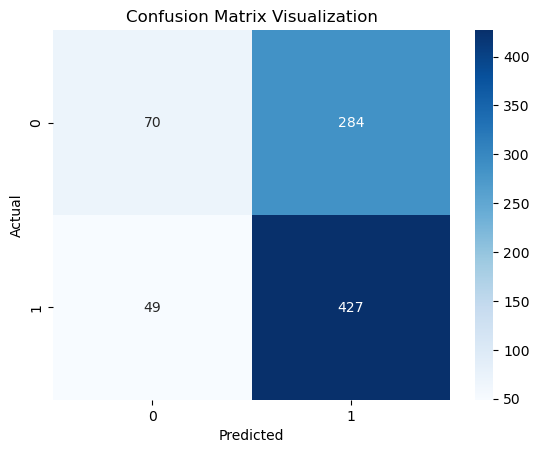

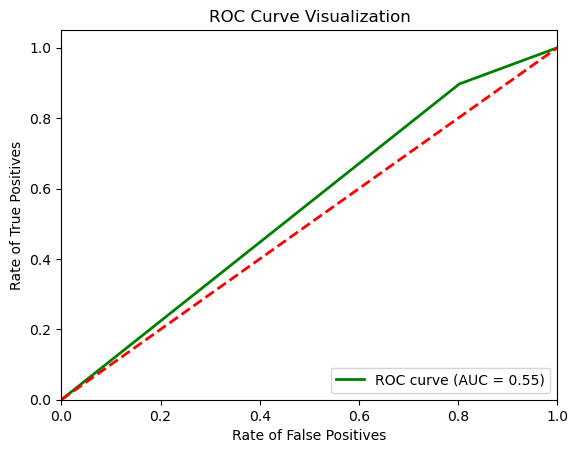

In [18]:
#plotting Confusion matrix
cm = confusion_matrix(y_test,y_pred_svm)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Visualization')
plt.show()

#ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_svm)
roc_auc = auc(fpr, tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='green', lw=lw, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Rate of False Positives')
plt.ylabel('Rate of True Positives')
plt.title('ROC Curve Visualization')
plt.legend(loc="lower right")
plt.show()

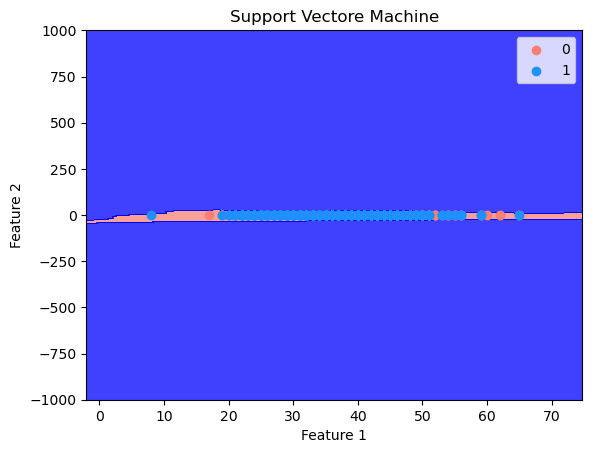

In [19]:
#Decision bounday plot
X_values = X_test.values
X1, X2 = np.meshgrid(np.arange(start=X_values[:, 0].min() - 10, stop=X_values[:, 0].max() + 10, step=0.25),
                     np.arange(start=X_values[:, 1].min() - 1000, stop=X_values[:, 1].max() + 1000, step=0.25))

Z = SVM.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape) 
plt.contourf(X1, X2, Z, alpha=0.75, cmap=ListedColormap(('salmon', 'blue')))
# Scatter plot of the test data points
for i, j in enumerate(np.unique(y_test)):
    plt.scatter(X_values[y_test == j, 0], X_values[y_test == j, 1], c=ListedColormap(('salmon', 'dodgerblue'))(i), label=j)

plt.title('Support Vectore Machine')
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

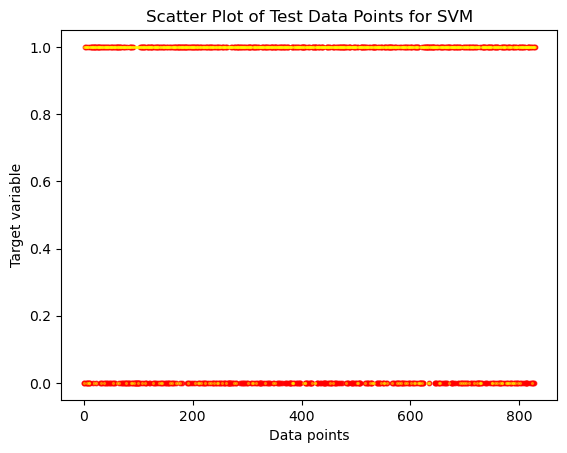

In [20]:
#scatter plot for test data
plt.scatter(range(len(y_test)), y_test, color='red', label='Actual values',s=10,alpha= 0.8)
plt.scatter(range(len(y_test)), y_pred_svm, color='yellow', label='Predicted values', marker='x',s=2,alpha=0.5)
plt.xlabel('Data points')
plt.ylabel('Target variable')
plt.title('Scatter Plot of Test Data Points for SVM')
plt.show()

###### Decision trees

In [21]:
#training the model
from sklearn.tree import DecisionTreeClassifier
decisionTree = DecisionTreeClassifier(criterion = 'entropy', random_state = 42)
decisionTree.fit(X_train_pca, y_train)

#predicting the values
y_pred_dt = decisionTree.predict(X_test_pca)

In [22]:
#performance metrics
accuracy = accuracy_score(y_test, y_pred_dt)
precision = precision_score(y_test, y_pred_dt)
recall = recall_score(y_test, y_pred_dt)
f1Score = f1_score(y_test, y_pred_dt)
classify_report = classification_report(y_test, y_pred_dt)

print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)
print("f1 Score: ", f1Score)
print("Report: ", classify_report)

Accuracy:  0.5566265060240964
Precision:  0.6158798283261803
Recall:  0.6029411764705882
f1 Score:  0.6093418259023354
Report:                precision    recall  f1-score   support

           0       0.48      0.49      0.49       354
           1       0.62      0.60      0.61       476

    accuracy                           0.56       830
   macro avg       0.55      0.55      0.55       830
weighted avg       0.56      0.56      0.56       830



###### Optimization of decision trees

In [23]:
#Hyper parameters
params_dt = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'auto', 'sqrt', 'log2'],
    'class_weight': [None, 'balanced']
}
#Tuning the hyper parameters and printing the best parameters
optimised_model_dt = GridSearchCV(decisionTree, params_dt, cv=5)
optimised_model_dt.fit(X_train_pca, y_train)
print("Best Hyperparameters:", optimised_model_dt.best_params_)
print("Best Accuracy on Training Set:", optimised_model_dt.best_score_)

Best Hyperparameters: {'class_weight': None, 'criterion': 'gini', 'max_features': 'sqrt', 'min_samples_leaf': 4, 'splitter': 'random'}
Best Accuracy on Training Set: 0.5851232986243617


In [41]:
#Training the model on these best parameters
best_decisionTree = DecisionTreeClassifier(criterion = 'gini', random_state = 42, class_weight=None, min_samples_leaf=4,splitter='random',max_features='sqrt')
best_decisionTree.fit(X_train_pca, y_train)

#predicting the test values
y_pred_dt = best_decisionTree.predict(X_test_pca)

In [42]:
#Calculating the performance metrics
accuracy = accuracy_score(y_test, y_pred_dt)
precision = precision_score(y_test, y_pred_dt)
recall = recall_score(y_test, y_pred_dt)
f1Score = f1_score(y_test, y_pred_dt)
classify_report = classification_report(y_test, y_pred_dt)

print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)
print("f1 Score: ", f1Score)
print("Report: ", classify_report)

Accuracy:  0.5783132530120482
Precision:  0.5768292682926829
Recall:  0.9936974789915967
f1 Score:  0.7299382716049383
Report:                precision    recall  f1-score   support

           0       0.70      0.02      0.04       354
           1       0.58      0.99      0.73       476

    accuracy                           0.58       830
   macro avg       0.64      0.51      0.38       830
weighted avg       0.63      0.58      0.44       830



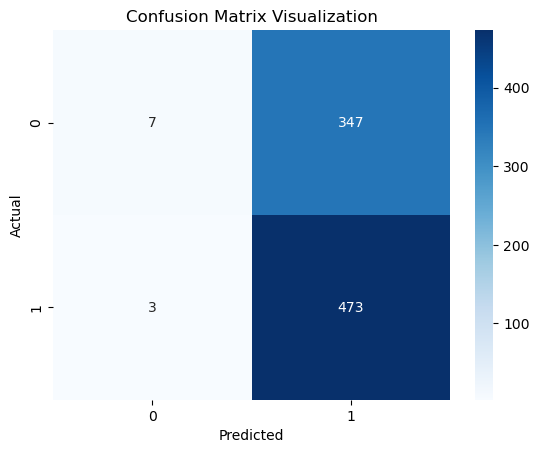

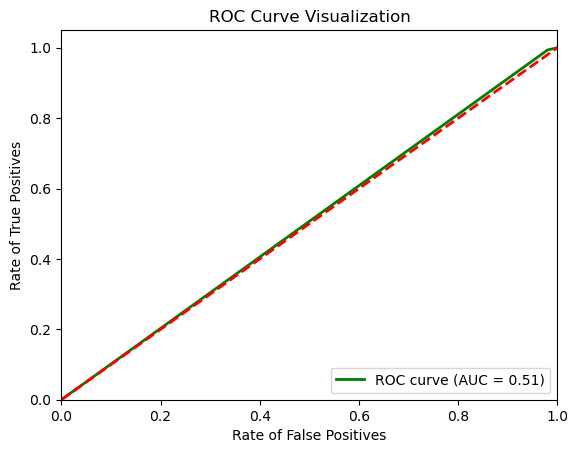

In [43]:
#plotting Confusion matrix
cm = confusion_matrix(y_test,y_pred_dt)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Visualization')
plt.show()

#ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_dt)
roc_auc = auc(fpr, tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='green', lw=lw, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Rate of False Positives')
plt.ylabel('Rate of True Positives')
plt.title('ROC Curve Visualization')
plt.legend(loc="lower right")
plt.show()

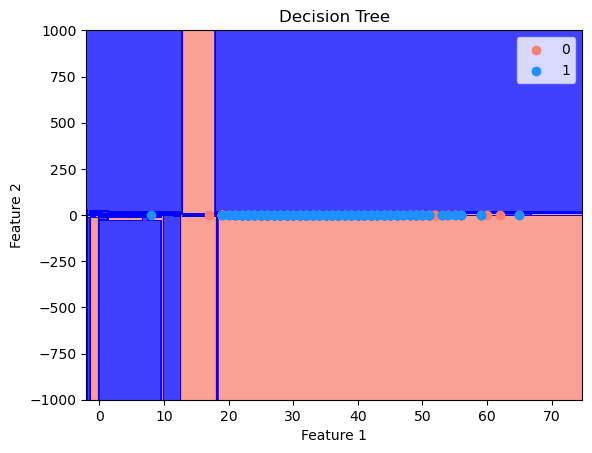

In [44]:
#Decision bounday plot
X_values = X_test.values
X1, X2 = np.meshgrid(np.arange(start=X_values[:, 0].min() - 10, stop=X_values[:, 0].max() + 10, step=0.25),
                     np.arange(start=X_values[:, 1].min() - 1000, stop=X_values[:, 1].max() + 1000, step=0.25))

Z = decisionTree.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape) 
plt.contourf(X1, X2, Z, alpha=0.75, cmap=ListedColormap(('salmon', 'blue'))) #Decision boundary
# Scatter plot of the test data points
for i, j in enumerate(np.unique(y_test)):
    plt.scatter(X_values[y_test == j, 0], X_values[y_test == j, 1], c=ListedColormap(('salmon', 'dodgerblue'))(i), label=j)

plt.title('Decision Tree')
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

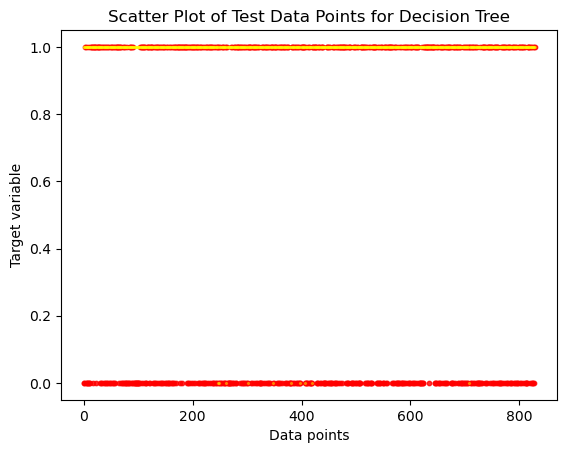

In [45]:
#scatter plot for test data
plt.scatter(range(len(y_test)), y_test, color='red', label='Actual values',s=10,alpha= 0.8)
plt.scatter(range(len(y_test)), y_pred_dt, color='yellow', label='Predicted values', marker='x',s=2,alpha=0.5)
plt.xlabel('Data points')
plt.ylabel('Target variable')
plt.title('Scatter Plot of Test Data Points for Decision Tree')
plt.show()

###### XG Boost

In [27]:
#Training the XGBoost model
from xgboost import XGBClassifier
xgBoost = XGBClassifier()
xgBoost.fit(X_train_pca, y_train)

#Predicting the test data results
y_pred_xg = xgBoost.predict(X_test_pca)

In [28]:
#Performance metrics
accuracy = accuracy_score(y_test, y_pred_xg)
precision = precision_score(y_test, y_pred_xg)
recall = recall_score(y_test, y_pred_xg)
f1Score = f1_score(y_test, y_pred_xg)
classify_report = classification_report(y_test, y_pred_xg)

print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)
print("f1 Score: ", f1Score)
print("Report: ", classify_report)

Accuracy:  0.536144578313253
Precision:  0.5811051693404634
Recall:  0.6848739495798319
f1 Score:  0.6287367405978784
Report:                precision    recall  f1-score   support

           0       0.44      0.34      0.38       354
           1       0.58      0.68      0.63       476

    accuracy                           0.54       830
   macro avg       0.51      0.51      0.51       830
weighted avg       0.52      0.54      0.52       830



###### Optimization of Xgboost

In [47]:
#Hyper parameters
param_xg = {
    'learning_rate': [0.01, 0.1, 0.5, 1],
    'max_depth': [1,2,3, 4, 5],
    'n_estimators': [25,50, 100, 200]
}

#Tuning the hyper parameters and printing the best parameters
optimised_model_xg = GridSearchCV(xgBoost, param_xg)
optimised_model_xg.fit(X_train_pca, y_train)
print("Best Hyperparameters:", optimised_model_xg.best_params_)
print("Best Accuracy on Training Set:", optimised_model_xg.best_score_)

Best Hyperparameters: {'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 100}
Best Accuracy on Training Set: 0.6001839938941286


In [70]:
#Training the model on these best parameters
best_xgBoost = XGBClassifier(learning_rate='0.01',max_depth=4,n_estimators=100)
best_xgBoost.fit(X_train_pca, y_train)

#predicting the test values
y_pred_xg = best_xgBoost.predict(X_test_pca)

In [71]:
#Calculating the performance metrics
accuracy = accuracy_score(y_test, y_pred_xg)
precision = precision_score(y_test, y_pred_xg)
recall = recall_score(y_test, y_pred_xg)
f1Score = f1_score(y_test, y_pred_xg)
classify_report = classification_report(y_test, y_pred_xg)

print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)
print("f1 Score: ", f1Score)
print("Report: ", classify_report)

Accuracy:  0.5951807228915663
Precision:  0.5925925925925926
Recall:  0.9411764705882353
f1 Score:  0.7272727272727272
Report:                precision    recall  f1-score   support

           0       0.62      0.13      0.21       354
           1       0.59      0.94      0.73       476

    accuracy                           0.60       830
   macro avg       0.61      0.54      0.47       830
weighted avg       0.60      0.60      0.51       830



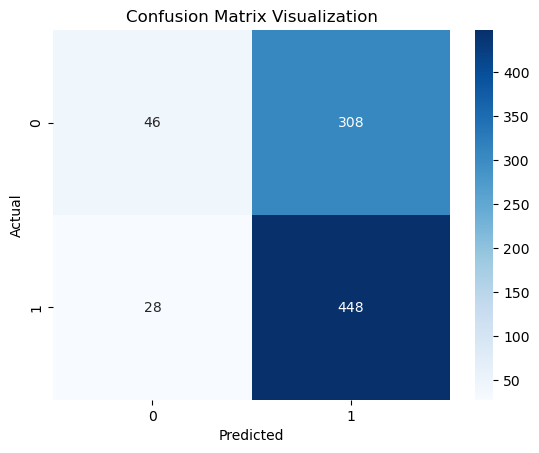

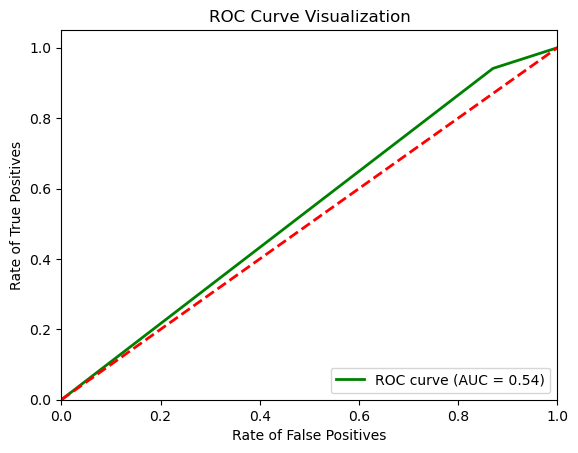

In [50]:
#plotting Confusion matrix
cm = confusion_matrix(y_test,y_pred_xg)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Visualization')
plt.show()

#ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_xg)
roc_auc = auc(fpr, tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='green', lw=lw, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Rate of False Positives')
plt.ylabel('Rate of True Positives')
plt.title('ROC Curve Visualization')
plt.legend(loc="lower right")
plt.show()

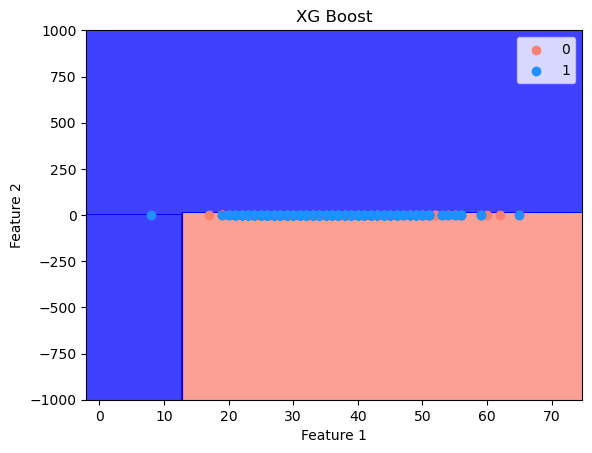

In [51]:
#Decision bounday plot
X_values = X_test.values
X1, X2 = np.meshgrid(np.arange(start=X_values[:, 0].min() - 10, stop=X_values[:, 0].max() + 10, step=0.25),
                     np.arange(start=X_values[:, 1].min() - 1000, stop=X_values[:, 1].max() + 1000, step=0.25))

Z = xgBoost.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape) 
plt.contourf(X1, X2, Z, alpha=0.75, cmap=ListedColormap(('salmon', 'blue'))) #Decision boundary
# Scatter plot of the test data points
for i, j in enumerate(np.unique(y_test)):
    plt.scatter(X_values[y_test == j, 0], X_values[y_test == j, 1], c=ListedColormap(('salmon', 'dodgerblue'))(i), label=j)

plt.title('XG Boost')
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

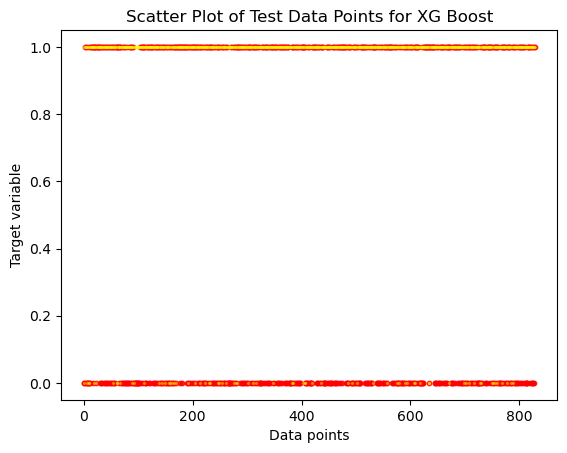

In [52]:
#scatter plot for test data
plt.scatter(range(len(y_test)), y_test, color='red', label='Actual values',s=10,alpha= 0.8)
plt.scatter(range(len(y_test)), y_pred_xg, color='yellow', label='Predicted values', marker='x',s=2,alpha=0.5)
plt.xlabel('Data points')
plt.ylabel('Target variable')
plt.title('Scatter Plot of Test Data Points for XG Boost')
plt.show()

###### Random Forest

In [60]:
#training the model
from sklearn.ensemble import RandomForestClassifier
random_forest_classifier = RandomForestClassifier(random_state=0)
random_forest_classifier.fit(X_train_pca, y_train) 

#Predicting the test result
y_pred = random_forest_classifier.predict(X_test_pca)

In [61]:
#performance mterics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1Score = f1_score(y_test, y_pred)
classify_report = classification_report(y_test, y_pred)

print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)
print("f1 Score: ", f1Score)
print("Report: ", classify_report)

Accuracy:  0.5771084337349398
Precision:  0.6299376299376299
Recall:  0.6365546218487395
f1 Score:  0.6332288401253917
Report:                precision    recall  f1-score   support

           0       0.50      0.50      0.50       354
           1       0.63      0.64      0.63       476

    accuracy                           0.58       830
   macro avg       0.57      0.57      0.57       830
weighted avg       0.58      0.58      0.58       830



###### Optimization of Random forest

In [62]:
#Hyper parameters
param_rf = {
    'n_estimators': [25,50, 100],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10,15],
    'max_features': ['auto', 'sqrt', 'log2'],
}

#Tuning the hyper parameters and printing the best parameters
optimised_model_rf = GridSearchCV(random_forest_classifier, param_rf)
optimised_model_rf.fit(X_train_pca, y_train)
print("Best Hyperparameters:", optimised_model_rf.best_params_)
print("Best Accuracy on Training Set:", optimised_model_rf.best_score_)

Best Hyperparameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_split': 15, 'n_estimators': 50}
Best Accuracy on Training Set: 0.5926511475767323


In [72]:
#Training the model on these best parameters
best_random_forest_classifier = RandomForestClassifier(n_estimators=50, random_state=0,max_depth=10,min_samples_split=15,max_features='sqrt')
best_random_forest_classifier.fit(X_train_pca, y_train) 

#predicting the test values
y_pred = best_random_forest_classifier.predict(X_test_pca)

In [73]:
#Calculating the performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1Score = f1_score(y_test, y_pred)
classify_report = classification_report(y_test, y_pred)

print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)
print("f1 Score: ", f1Score)
print("Report: ", classify_report)

Accuracy:  0.5614457831325301
Precision:  0.5877742946708464
Recall:  0.7878151260504201
f1 Score:  0.6732495511669659
Report:                precision    recall  f1-score   support

           0       0.47      0.26      0.33       354
           1       0.59      0.79      0.67       476

    accuracy                           0.56       830
   macro avg       0.53      0.52      0.50       830
weighted avg       0.54      0.56      0.53       830



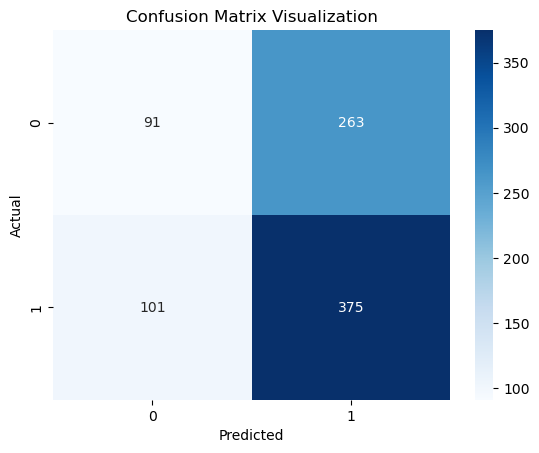

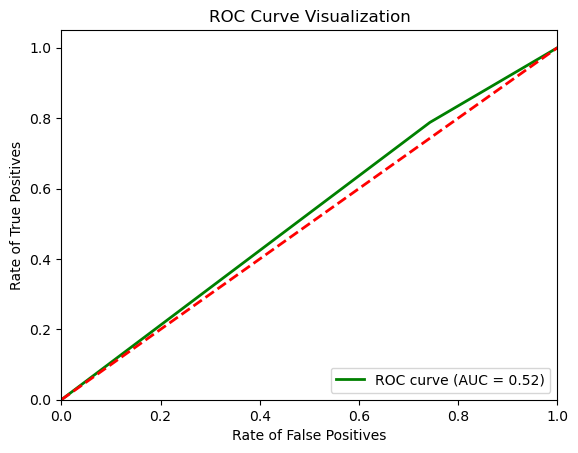

In [65]:
#plotting Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Visualization')
plt.show()

#ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='green', lw=lw, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Rate of False Positives')
plt.ylabel('Rate of True Positives')
plt.title('ROC Curve Visualization')
plt.legend(loc="lower right")
plt.show()

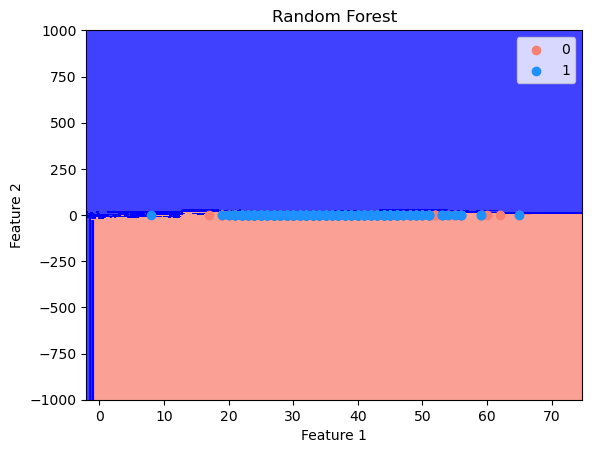

In [66]:
#Decision bounday plot
X_values = X_test.values
X1, X2 = np.meshgrid(np.arange(start=X_values[:, 0].min() - 10, stop=X_values[:, 0].max() + 10, step=0.25),
                     np.arange(start=X_values[:, 1].min() - 1000, stop=X_values[:, 1].max() + 1000, step=0.25))

Z = random_forest_classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape)
plt.contourf(X1, X2, Z, alpha=0.75, cmap=ListedColormap(('salmon', 'blue'))) #Decision boundary
# Scatter plot of the test data points
for i, j in enumerate(np.unique(y_test)):
    plt.scatter(X_values[y_test == j, 0], X_values[y_test == j, 1], c=ListedColormap(('salmon', 'dodgerblue'))(i), label=j)

plt.title('Random Forest')
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

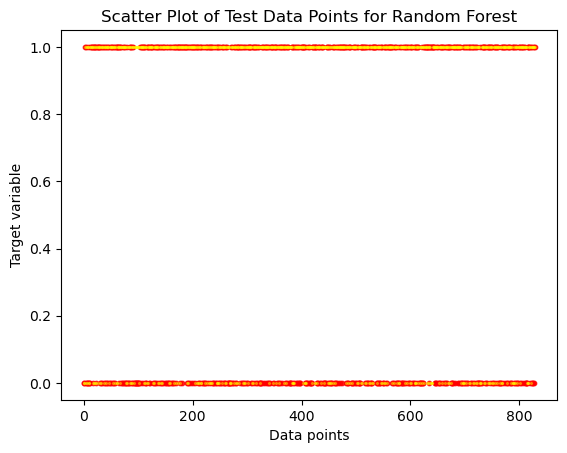

In [67]:
#scatter plot for test data
plt.scatter(range(len(y_test)), y_test, color='red', label='Actual values',s=10,alpha= 0.8)
plt.scatter(range(len(y_test)), y_pred, color='yellow', label='Predicted values', marker='x',s=2,alpha=0.5)
plt.xlabel('Data points')
plt.ylabel('Target variable')
plt.title('Scatter Plot of Test Data Points for Random Forest')
plt.show()

###### Voting Classifer

In [125]:
#Training the Voting classifier when voting is hard
from sklearn.ensemble import VotingClassifier
Voting_classifier = VotingClassifier(estimators=[('lr',best_lr_model),
                                                ('dt', best_decisionTree),
                                                ('xgb',best_xgBoost),
                                                ('rf',random_forest_classifier),
                                                ('svm',best_svm_model)],voting='hard')

Voting_classifier.fit(X_train_pca,y_train)

#Predicting the test results
y_pred_vc = Voting_classifier.predict(X_test_pca)

In [75]:
#Performance metrics
accuracy = accuracy_score(y_test, y_pred_vc)
precision = precision_score(y_test, y_pred_vc)
recall = recall_score(y_test, y_pred_vc)
f1Score = f1_score(y_test, y_pred_vc)
classify_report = classification_report(y_test, y_pred_vc)

print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)
print("f1 Score: ", f1Score)
print("Report: ", classify_report)

Accuracy:  0.6
Precision:  0.5970350404312669
Recall:  0.930672268907563
f1 Score:  0.7274220032840721
Report:                precision    recall  f1-score   support

           0       0.62      0.16      0.25       354
           1       0.60      0.93      0.73       476

    accuracy                           0.60       830
   macro avg       0.61      0.54      0.49       830
weighted avg       0.61      0.60      0.52       830



In [82]:
#Training the Voting classifier when voting is soft
Voting_classifier_1 = VotingClassifier(estimators=[('lr',best_lr_model),
                                                ('dt', best_decisionTree),
                                                ('xgb',best_xgBoost),
                                                ('rf',random_forest_classifier),
                                                ('svm',best_svm_model)],voting='soft')

Voting_classifier_1.fit(X_train_pca,y_train)

#Predicting the probabilities and then predicting the classes
y_pred_vc_1 = Voting_classifier_1.predict_proba(X_test_pca)
y_pred_vc_1= np.argmax(y_pred_vc_1, axis=1)

In [83]:
#Performance metrics
accuracy = accuracy_score(y_test, y_pred_vc_1)
precision = precision_score(y_test, y_pred_vc_1)
recall = recall_score(y_test, y_pred_vc_1)
f1Score = f1_score(y_test, y_pred_vc_1)
classify_report = classification_report(y_test, y_pred_vc_1)

print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)
print("f1 Score: ", f1Score)
print("Report: ", classify_report)

Accuracy:  0.5939759036144578
Precision:  0.5943012211668928
Recall:  0.9201680672268907
f1 Score:  0.7221764220939817
Report:                precision    recall  f1-score   support

           0       0.59      0.16      0.25       354
           1       0.59      0.92      0.72       476

    accuracy                           0.59       830
   macro avg       0.59      0.54      0.48       830
weighted avg       0.59      0.59      0.52       830



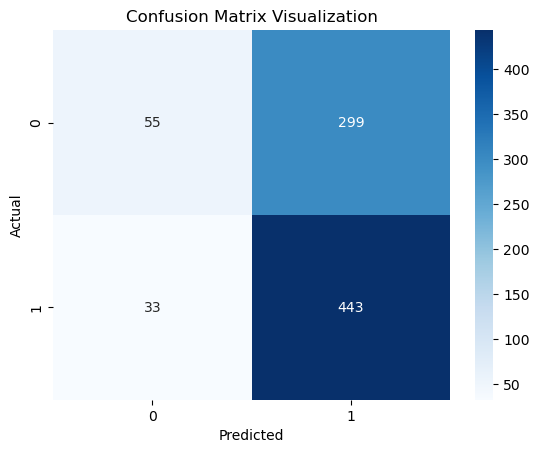

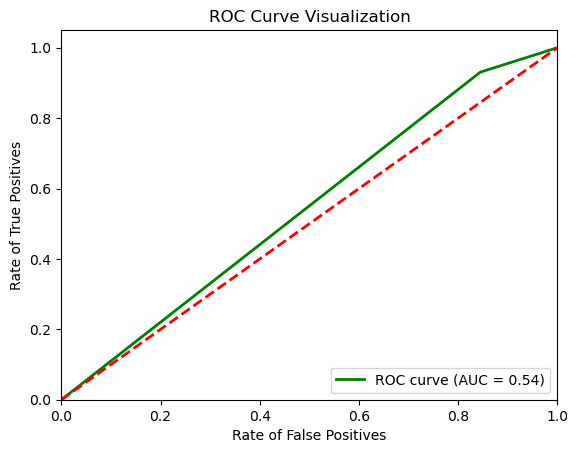

In [84]:
#Plotting graphs for hard voting as it fit better
#plotting Confusion matrix 
cm = confusion_matrix(y_test, y_pred_vc)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Visualization')
plt.show()

#ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_vc)
roc_auc = auc(fpr, tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='green', lw=lw, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Rate of False Positives')
plt.ylabel('Rate of True Positives')
plt.title('ROC Curve Visualization')
plt.legend(loc="lower right")
plt.show()

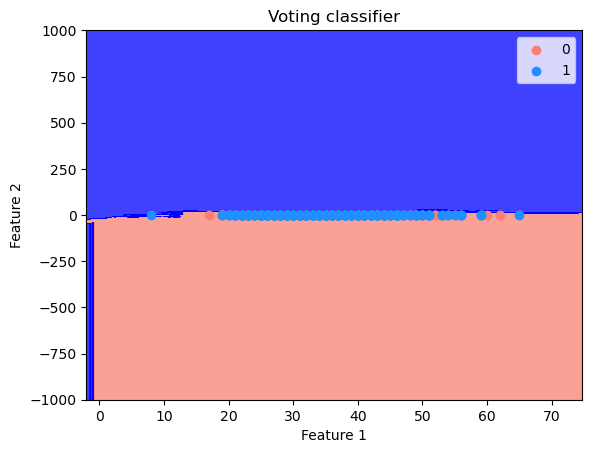

In [85]:
#Decision bounday plot
X_values = X_test.values
X1, X2 = np.meshgrid(np.arange(start=X_values[:, 0].min() - 10, stop=X_values[:, 0].max() + 10, step=0.25),
                     np.arange(start=X_values[:, 1].min() - 1000, stop=X_values[:, 1].max() + 1000, step=0.25))

Z = Voting_classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape)
plt.contourf(X1, X2, Z, alpha=0.75, cmap=ListedColormap(('salmon', 'blue'))) #Decision boundary
# Scatter plot of the test data points
for i, j in enumerate(np.unique(y_test)):
    plt.scatter(X_values[y_test == j, 0], X_values[y_test == j, 1], c=ListedColormap(('salmon', 'dodgerblue'))(i), label=j)

plt.title('Voting classifier')
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

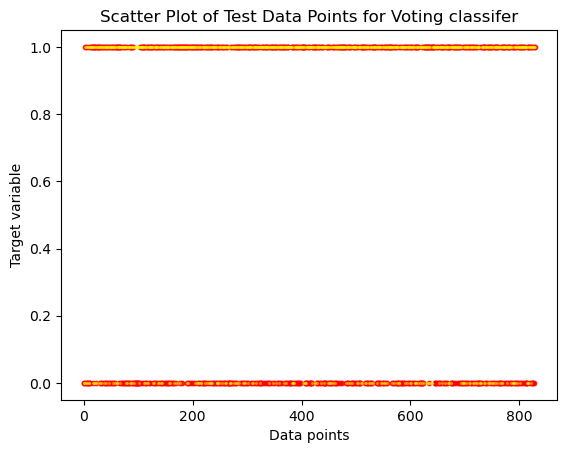

In [86]:
#scatter plot for test data
plt.scatter(range(len(y_test)), y_test, color='red', label='Actual values',s=10,alpha= 0.8)
plt.scatter(range(len(y_test)), y_pred, color='yellow', label='Predicted values', marker='x',s=2,alpha=0.5)
plt.xlabel('Data points')
plt.ylabel('Target variable')
plt.title('Scatter Plot of Test Data Points for Voting classifer')
plt.show()

###### Voting classifer without PCA

In [87]:
#training model
logistic_regression_1 = LogisticRegression(random_state=0)
decisionTree_1 = DecisionTreeClassifier(criterion = 'entropy', random_state = 42)
xgBoost_1 = XGBClassifier()
random_forest_classifier_1 = RandomForestClassifier(n_estimators=100, random_state=0)
SVM_1 = SVC(kernel = 'rbf', random_state = 42)
Voting_classifier_1 = VotingClassifier(estimators=[('lr',logistic_regression_1),
                                                ('dt', decisionTree_1),
                                                ('xgb',xgBoost_1),
                                                ('rf',random_forest_classifier_1),
                                                ('svm',SVM_1)],voting='hard')

Voting_classifier_1.fit(X_train,y_train)

#Testing the model
y_pred_vc = Voting_classifier_1.predict(X_test)

In [88]:
#Calculating the performance metrics
accuracy = accuracy_score(y_test, output)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1Score = f1_score(y_test, y_pred)
classify_report = classification_report(y_test, y_pred)

print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)
print("f1 Score: ", f1Score)
print("Report: ", classify_report)

Accuracy:  0.5951807228915663
Precision:  0.5877742946708464
Recall:  0.7878151260504201
f1 Score:  0.6732495511669659
Report:                precision    recall  f1-score   support

           0       0.47      0.26      0.33       354
           1       0.59      0.79      0.67       476

    accuracy                           0.56       830
   macro avg       0.53      0.52      0.50       830
weighted avg       0.54      0.56      0.53       830



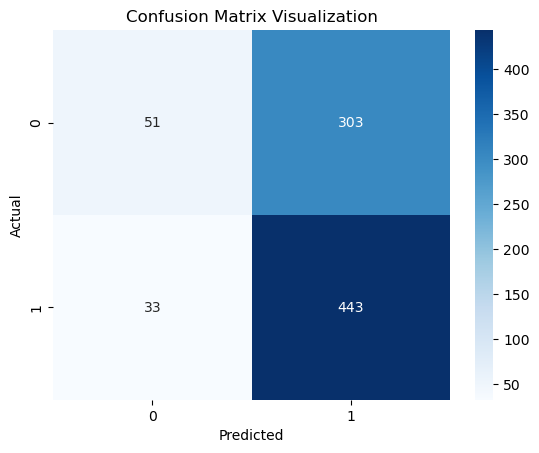

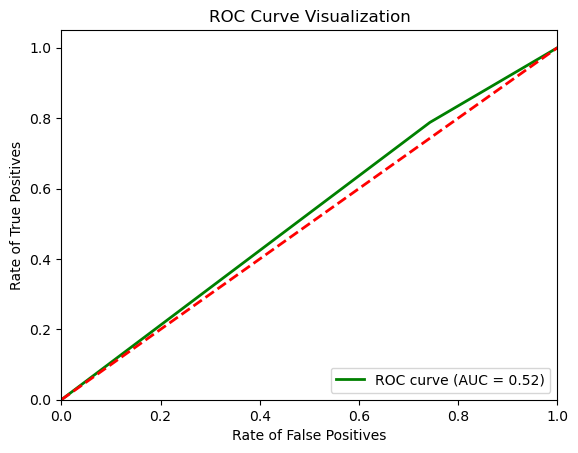

In [89]:
#plotting Confusion matrix
cm = confusion_matrix(y_test, output)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Visualization')
plt.show()

#ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='green', lw=lw, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Rate of False Positives')
plt.ylabel('Rate of True Positives')
plt.title('ROC Curve Visualization')
plt.legend(loc="lower right")
plt.show()

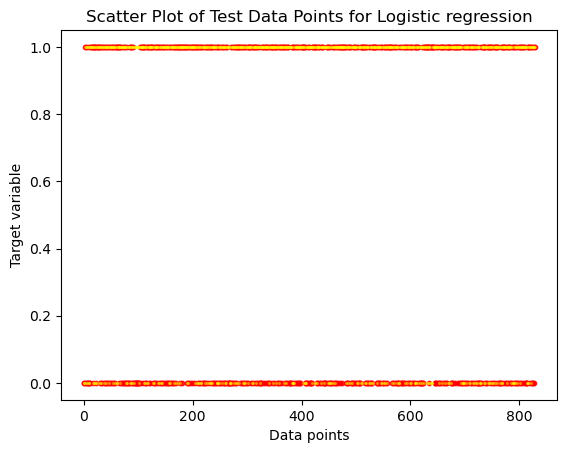

In [90]:
#scatter plot for test data
plt.scatter(range(len(y_test)), y_test, color='red', label='Actual values',s=10,alpha= 0.8)
plt.scatter(range(len(y_test)), y_pred, color='yellow', label='Predicted values', marker='x',s=2,alpha=0.5)
plt.xlabel('Data points')
plt.ylabel('Target variable')
plt.title('Scatter Plot of Test Data Points for Logistic regression')
plt.show()

###### Neural Network

In [131]:
#Libraries needed to NN apart from others
from torch import nn
from torch.utils.data import Dataset, DataLoader , TensorDataset
from torch.nn import functional as F
from torch import optim
import torch
from torchinfo import summary

In [132]:
#Neural network structure
class NeuralNetwork(nn.Module):
    def __init__(self,dropout=0,activation='relu'):
        super().__init__()
        self.flatten = nn.Flatten()
        self.hidden1 = nn.Linear(16, 256)
        self.drop1 = nn.Dropout(dropout)
        self.hidden2 = nn.Linear(256,64)
        self.output = nn.Linear(64,1)
        activation_functions = {
            'relu': nn.ReLU(),
            'sigmoid': nn.Sigmoid(),
            'tanh': nn.Tanh(),
            'elu' : nn.ELU()
            
        }

        self.activation = activation_functions[activation]

        
    def forward(self, x):
        x = self.flatten(x)
        x = self.activation(self.hidden1(x))
        x = self.drop1(x)
        x = self.activation(self.hidden2(x))
        x = self.output(x)
        #x = self.act()
        return x
model = NeuralNetwork()

In [133]:
#Summary of the model
summary(model)

Layer (type:depth-idx)                   Param #
NeuralNetwork                            --
├─Flatten: 1-1                           --
├─Linear: 1-2                            4,352
├─Dropout: 1-3                           --
├─Linear: 1-4                            16,448
├─Linear: 1-5                            65
├─ReLU: 1-6                              --
Total params: 20,865
Trainable params: 20,865
Non-trainable params: 0

In [134]:
#Converting the train dataset to tensors
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

X_train = torch.tensor(X_train.to_numpy(),dtype=torch.float32)
y_train = torch.tensor(y_train.to_numpy(),dtype=torch.float32)

In [135]:
#Defining loss function and optimizer
loss_fn = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr=0.001)

#Converting into tensor dataset and loading to the model in batches of 35
train_dataset = TensorDataset(X_train,y_train)
train_loader = DataLoader(train_dataset, batch_size=35, shuffle=True)

train_loss = []
train_accuracy=[]

#Training the model over epochs
for epoch in range(100):
    model.train(True)
    correct_train = 0
    total_train = 0
    for X_train, y_train in train_loader:
        optimizer.zero_grad()
        output = model(X_train)
        output_sigmoid = nn.Sigmoid()(output)
        loss = loss_fn(output_sigmoid.squeeze(),y_train)
        loss.backward()
        optimizer.step()
        
        predicted = (output_sigmoid.squeeze()>0.5).float()
        total_train+=y_train.size(0)
        correct_train+= (predicted == y_train).sum().item()
        
    train_acc = 100 * correct_train / total_train
    train_accuracy.append(train_acc)
    train_loss.append(loss)
    print("Epoch [{}], Train Loss: {:.4f}, Train Accuracy: {:.2f}%".format(epoch, loss.item(), train_acc))

Epoch [0], Train Loss: 34.4828, Train Accuracy: 57.10%
Epoch [1], Train Loss: 48.2759, Train Accuracy: 57.19%
Epoch [2], Train Loss: 51.7241, Train Accuracy: 57.19%
Epoch [3], Train Loss: 58.6207, Train Accuracy: 57.19%
Epoch [4], Train Loss: 34.4828, Train Accuracy: 57.19%
Epoch [5], Train Loss: 17.2414, Train Accuracy: 57.19%
Epoch [6], Train Loss: 34.4828, Train Accuracy: 57.19%
Epoch [7], Train Loss: 34.4828, Train Accuracy: 57.19%
Epoch [8], Train Loss: 41.3793, Train Accuracy: 57.19%
Epoch [9], Train Loss: 48.2759, Train Accuracy: 57.19%
Epoch [10], Train Loss: 37.9310, Train Accuracy: 57.19%
Epoch [11], Train Loss: 51.7241, Train Accuracy: 57.19%
Epoch [12], Train Loss: 44.8276, Train Accuracy: 57.19%
Epoch [13], Train Loss: 51.7241, Train Accuracy: 57.19%
Epoch [14], Train Loss: 44.8276, Train Accuracy: 57.19%
Epoch [15], Train Loss: 41.3793, Train Accuracy: 57.19%
Epoch [16], Train Loss: 62.0690, Train Accuracy: 57.19%
Epoch [17], Train Loss: 44.8276, Train Accuracy: 57.19%
Ep

In [136]:
#Converting the test sets to tensors
import time

X_test = torch.tensor(X_test.to_numpy(),dtype=torch.float32)
y_test = torch.tensor(y_test.values,dtype=torch.float32)

In [137]:
#testing the model on test data
from torchmetrics.classification import BinaryAccuracy
start_time = time.time()
test_output = model(X_test)
output_test = nn.Sigmoid()(test_output)
end_time = time.time()
loss_test = loss_fn(output_test.squeeze(),y_test)

metric = BinaryAccuracy()
accuracy = metric(output_test.squeeze(), y_test)
print(accuracy)
print(end_time-start_time)

tensor(0.5735)
0.033057451248168945


In [138]:
#Performance metrics
y_pred = []
for i in output_test.squeeze():
    if i >= 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred,average='micro')
recall = recall_score(y_test, y_pred,average='micro')
f1Score = f1_score(y_test, y_pred,average='micro')
classify_report = classification_report(y_test, y_pred)


print("accuracy_score: ",accuracy ) 
print("precision_score: ", precision)
print("recall_score: ", recall)
print("f1_score: ", f1Score)
print("classification_report: \n", classify_report)

accuracy_score:  0.5734939759036145
precision_score:  0.5734939759036145
recall_score:  0.5734939759036145
f1_score:  0.5734939759036145
classification_report: 
               precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       354
         1.0       0.57      1.00      0.73       476

    accuracy                           0.57       830
   macro avg       0.29      0.50      0.36       830
weighted avg       0.33      0.57      0.42       830



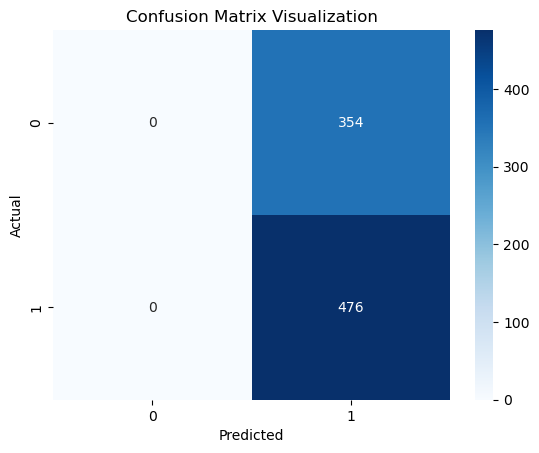

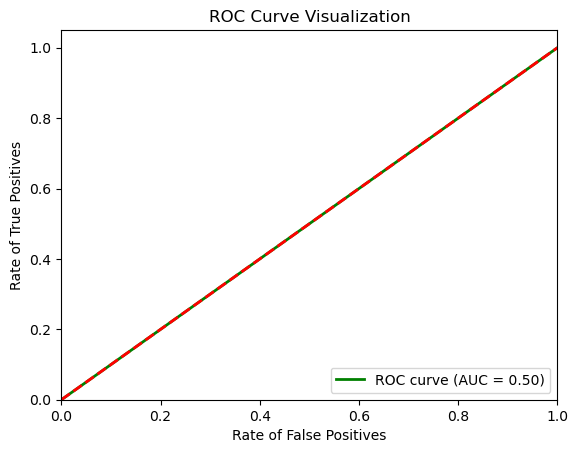

In [139]:
#Confusion mtrics
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Visualization')
plt.show()

# Plot the ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='green', lw=lw, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Rate of False Positives')
plt.ylabel('Rate of True Positives')
plt.title('ROC Curve Visualization')
plt.legend(loc="lower right")
plt.show()

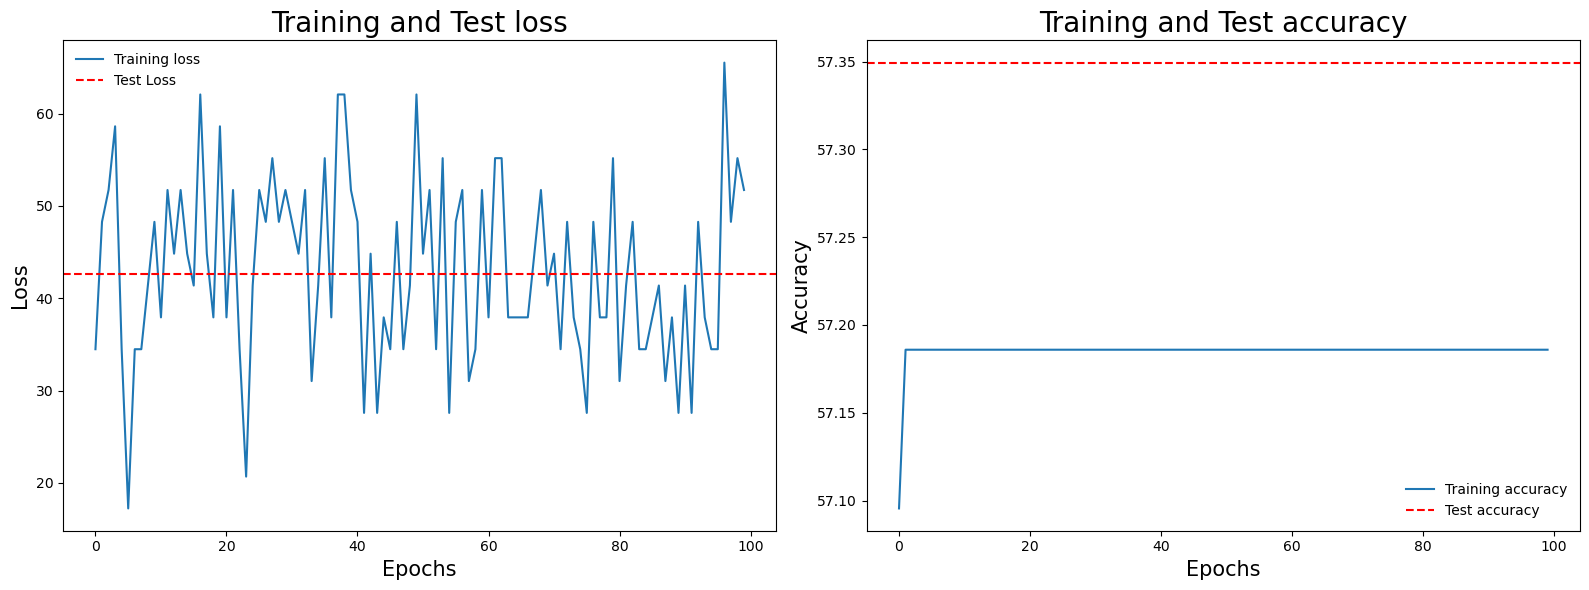

In [140]:
#Test loss, train loss graphs
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,6))

train_loss = [loss.item() for loss in train_loss]
# Plotting loss on the first axis
ax1.plot(train_loss, label='Training loss')
ax1.set_title('Training and Test loss', fontsize=20)
ax1.axhline(y=loss_test.detach().numpy(), color='r', linestyle='--', label='Test Loss')
ax1.set_xlabel('Epochs', fontsize=15)
ax1.set_ylabel('Loss', fontsize=15)
ax1.legend(frameon=False)

# Plotting accuracy on the second axis
ax2.plot(train_accuracy, label='Training accuracy')
ax2.axhline(y=accuracy*100, color='r', linestyle='--', label='Test accuracy')
ax2.set_title('Training and Test accuracy', fontsize=20)
ax2.set_xlabel('Epochs', fontsize=15)
ax2.set_ylabel('Accuracy', fontsize=15)
ax2.legend(frameon=False)

plt.tight_layout()
plt.show()